# LOAD package

In [1]:
from astropy.io import fits
import numpy as np
from multiprocessing import Process
from sklearn.neighbors import BallTree
from astropy.cosmology import FlatLambdaCDM
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
from astropy.table import Table,Column,hstack,vstack
from astropy.io import ascii
import os
import matplotlib.colors as mcolors

In [2]:
from astropy.cosmology import FlatLambdaCDM,z_at_value
cosmo = FlatLambdaCDM(H0 = 67.74,Om0 = 0.3089,Ob0 = 0.0486)
import matplotlib.pyplot as plt
import astropy.units as u
import pandas as pd

In [3]:
import seaborn as sns
sns.set()

# VVDS DEEP

In [4]:
SED_Para = ['IDENT','SCALE_BEST','MOD_BEST','EXTLAW_BEST','EBV_BEST','CHI_BEST','NBAND_USED', \
            'AGE_BEST','AGE_INF','AGE_MED','AGE_SUP','MASS_BEST','MASS_INF','MASS_MED','MASS_SUP',\
            'SFR_BEST','SFR_INF','SFR_MED','SFR_SUP','SSFR_BEST','SSFR_INF','SSFR_MED','SSFR_SUP', \
            'B_OBS','V_OBS','R_OBS','I_OBS','u_OBS','g_OBS','r_OBS','i_OBS','z_OBS',\
            'ERR_B_OBS','ERR_V_OBS','ERR_R_OBS','ERR_I_OBS','ERR_u_OBS','ERR_g_OBS','ERR_r_OBS','ERR_i_OBS','ERR_z_OBS',\
            'B_MOD','V_MOD','R_MOD','I_MOD','u_MOD','g_MOD','r_MOD','i_MOD','z_MOD',\
            'CONTEXT','ZSPEC',\
            'B_ABS','V_ABS','R_ABS','I_ABS','u_ABS','g_ABS','r_ABS','i_ABS','z_ABS',\
            'Z_MAX']



deep = pd.read_table('/home/hygao/research/LePHARE/lephare_dev/zy_VVDS_deep_BVRIugriz/VVDS_deep_BVRIugriz.out',\
                              sep='\s+',skiprows=59,header=None,names=SED_Para,index_col=False)

In [5]:
zmax_deep = np.array(deep['Z_MAX'])
redshift_deep = np.array(deep['ZSPEC'])

In [6]:
redshift_deep.shape

(8153,)

In [7]:
cigale_deep = Table.read("/home/yunzheng/PAC/code/VVDS_desi/VVDS_SED_DEEP/deep_BVRIugriz/out/results.fits")

In [8]:
cigale_deep.columns

<TableColumns names=('id','bayes.param.restframe_Lnu(sdss.gp)','bayes.param.restframe_Lnu(sdss.gp)_err','bayes.param.restframe_Lnu(sdss.rp)','bayes.param.restframe_Lnu(sdss.rp)_err','bayes.param.restframe_Lnu(sdss.up)','bayes.param.restframe_Lnu(sdss.up)_err','bayes.stellar.m_star','bayes.stellar.m_star_err','bayes.subaru.hsc.g','bayes.subaru.hsc.g_err','bayes.subaru.hsc.r','bayes.subaru.hsc.r_err','best.chi_square','best.reduced_chi_square','best.attenuation.E_BVs.nebular.continuum_old','best.attenuation.E_BVs.nebular.continuum_young','best.attenuation.E_BVs.nebular.lines_old','best.attenuation.E_BVs.nebular.lines_young','best.attenuation.E_BVs.stellar.old','best.attenuation.E_BVs.stellar.young','best.attenuation.ebvs_old_factor','best.attenuation.powerlaw_slope','best.attenuation.subaru.hsc.g','best.attenuation.uv_bump_amplitude','best.attenuation.uv_bump_wavelength','best.attenuation.uv_bump_width','best.nebular.f_dust','best.nebular.f_esc','best.nebular.lines_width','best.nebular.l

In [8]:
deep0 = Table.read("/home/yunzheng/PAC/code/VVDS_desi/VVDS_cesam_cata/cesam_vvds_spF02_DEEP_Full.fits")

In [8]:
deep0

NUM,ID-IAU,ALPHA,DELTA,MAGI,Z,ZFLAGS,MAG_U_CFH12K,MAGERR_AUTO_U,MAG_B_CFH12K,MAGERR_AUTO_B,MAG_V_CFH12K,MAGERR_AUTO_V,MAG_R_CFH12K,MAGERR_AUTO_R,MAG_I_CFH12K,MAGERR_AUTO_I,MAG_U_CFHTLS,MAGERR_AUTO_U_1,MAG_G_CFHTLS,MAGERR_AUTO_G,MAG_R_CFHTLS,MAGERR_AUTO_R_1,MAG_I_CFHTLS,MAGERR_AUTO_I_1,MAG_Z_CFHTLS,MAGERR_AUTO_Z,MAG_AUTO_U_UNCORR,MAG_AUTO_U_CORR,MAG_AUTO_ULOIANO,MAGERR_AUTO_ULOIANO,MAG_AUTO_B_UNCORR,MAG_AUTO_B_CORR,MAG_AUTO_V_UNCORR,MAG_AUTO_V_CORR,MAG_AUTO_R_UNCORR,MAG_AUTO_R_CORR,MAG_AUTO_I_UNCORR,MAG_AUTO_I_CORR,MAG1_APER_U,MAG1ERR_APER_U,MAG2_APER_U,MAG2ERR_APER_U,MAG1_APER_ULOIANO,MAG1ERR_APER_ULOIANO,MAG2_APER_ULOIANO,MAG2ERR_APER_ULOIANO,ISOAREA_IMAGE_U,THRESHOLD_U,MU_THRESHOLD_U,BACKGROUND_U,FLUX_MAX_U,MU_MAX_U,KRON_RADIUS_U,FLUX1_RADIUS_U,FLUX2_RADIUS_U,FLUX3_RADIUS_U,MAG_ISO_U,MAGERR_ISO_U,FLUX_ISO_U,FLUXERR_ISO_U,MAG_ISOCOR_U,MAGERR_ISOCOR_U,FLUX_ISOCOR_U,FLUXERR_ISOCOR_U,FLUX_AUTO_U,FLUXERR_AUTO_U,MAG_BEST_U,MAGERR_BEST_U,FLUX_BEST_U,FLUXERR_BEST_U,FLUX1_APER_U,FLUX1ERR_APER_U,FLUX2_APER_U,FLUX2ERR_APER_U,FLAGS_U,MAG1_APER_B,MAG1ERR_APER_B,MAG2_APER_B,MAG2ERR_APER_B,ISOAREA_IMAGE_B,THRESHOLD_B,MU_THRESHOLD_B,BACKGROUND_B,FLUX_MAX_B,MU_MAX_B,KRON_RADIUS_B,FLUX1_RADIUS_B,FLUX2_RADIUS_B,FLUX3_RADIUS_B,MAG_ISO_B,MAGERR_ISO_B,FLUX_ISO_B,FLUXERR_ISO_B,MAG_ISOCOR_B,MAGERR_ISOCOR_B,FLUX_ISOCOR_B,FLUXERR_ISOCOR_B,FLUX_AUTO_B,FLUXERR_AUTO_B,MAG_BEST_B,MAGERR_BEST_B,FLUX_BEST_B,FLUXERR_BEST_B,FLUX1_APER_B,FLUX1ERR_APER_B,FLUX2_APER_B,FLUX2ERR_APER_B,FLAGS_B,MAG_AUTO_J_WIRDS,MAGERR_AUTO_J_WIRDS,MAG_AUTO_H_WIRDS,MAGERR_AUTO_H_WIRDS,MAG_AUTO_K_WIRDS,MAGERR_AUTO_K_WIRDS,MAG_APER_J_WIRDS,MAGERR_APER_J_WIRDS,MAG_APER_H_WIRDS,MAGERR_APER_H_WIRDS,MAG_APER_K_WIRDS,MAGERR_APER_K_WIRDS,MAG_J_UKIDSS,MAGERR_J_UKIDSS,MAG_J_UKIDSS_CORR,MAG_K_UKIDSS,MAGERR_K_UKIDSS,MAG_K_UKIDSS_CORR,ZPHOT,ZPHOT_68_LOW,ZPHOT_68_HIGH,CHI2_GAL,ZPHOT_QSO,CHI2_QSO,CHI2_STAR,TYPE,CWW_MODEL,MAG_ABS_U_CFHTLS,MAG_ABS_G_CFHTLS,MAG_ABS_R_CFHTLS,MAG_ABS_I_CFHTLS,MAG_ABS_Z_CFHTLS,MAG_ABS_U_JKC,MAG_ABS_B_JKC,MAG_ABS_V_JKC,MAG_ABS_R_JKC,MAG_ABS_I_JKC,name1_4GHz,Fp14,Fp14er,Ft14,Ft14er,Fitmaj14,Fitmin14,PosAng14,Fp06,Fp06er,Ft06,Ft06er,Fitmaj06,Fitmin06,PosAng06,FLAG_GOOD_PZW,TSR,TSR_ERR_LOW,TSR_ERR_HIGH,W129,W129_ERR,SSR,SSR_ERR_LOW,SSR_ERR_HIGH,PSR,PSR_ERR_LOW,PSR_ERR_HIGH,TSR_ERR,AGE,E(B-V),MFUV,MNUV,STELLAR_MASS,SFR,NBAND,A_FUV,CWW_TYPE,DELTA_5MPC,FLAG_D_5MPC,DELTA_8MPC,FLAG_D_8MPC,A_WORLD,ERRA_WORLD,B_WORLD,ERRB_WORLD,THETA_J2000,ERRTHETA_J2000,FLAG,ZMETHOD,SPMASK_OBS,QUAD,SLIT,OBJ,ID_GALEX,FUV_NCAT_MAG_COR1,FUV_NCAT_MAGERR_COR1,NUV_MAG_COR1,NUV_MAGERR_COR1,ID_SWIRE,FLUX_AP1_36,UNCF_AP1_36,FLUX_AP2_36,UNCF_AP2_36,FLUX_AP3_36,UNCF_AP3_36,FLUX_AP4_36,UNCF_AP4_36,FLUX_AP5_36,UNCF_AP5_36,FLUX_KR_36,UNCF_KR_36,MAG_KR_36,RAD_KR_36,FLUX_ISO_36,UNCF_ISO_36,AREA_ISO_36,FLUX_ISOCOR_36,UNCF_ISOCOR_36,STELL_36,A_36,B_36,THETA_36,FWHM_36,FLUX_AP1_45,UNCF_AP1_45,FLUX_AP2_45,UNCF_AP2_45,FLUX_AP3_45,UNCF_AP3_45,FLUX_AP4_45,UNCF_AP4_45,FLUX_AP5_45,UNCF_AP5_45,FLUX_KR_45,UNCF_KR_45,MAG_KR_45,RAD_KR_45,FLUX_ISO_45,UNCF_ISO_45,AREA_ISO_45,FLUX_ISOCOR_45,UNCF_ISOCOR_45,STELL_45,A_45,B_45,THETA_45,FWHM_45,FLUX_AP1_58,UNCF_AP1_58,FLUX_AP2_58,UNCF_AP2_58,FLUX_AP3_58,UNCF_AP3_58,FLUX_AP4_58,UNCF_AP4_58,FLUX_AP5_58,UNCF_AP5_58,FLUX_KR_58,UNCF_KR_58,MAG_KR_58,RAD_KR_58,FLUX_ISO_58,UNCF_ISO_58,AREA_ISO_58,FLUX_ISOCOR_58,UNCF_ISOCOR_58,STELL_58,A_58,B_58,THETA_58,FWHM_58,FLUX_AP1_80,UNCF_AP1_80,FLUX_AP2_80,UNCF_AP2_80,FLUX_AP3_80,UNCF_AP3_80,FLUX_AP4_80,UNCF_AP4_80,FLUX_AP5_80,UNCF_AP5_80,FLUX_KR_80,UNCF_KR_80,MAG_KR_80,RAD_KR_80,FLUX_ISO_80,UNCF_ISO_80,AREA_ISO_80,FLUX_ISOCOR_80,UNCF_ISOCOR_80,STELL_80,A_80,B_80,THETA_80,FWHM_80,FLUX_PRF_24,FLUX_PRF_70,FLUX_PRF_160,UNCF_PRF_24,UNCF_PRF_70,UNCF_PRF_160,STAT_24,STAT_70,STAT_160,SIG,D_SIG,SIGB,D_SIGB,EW_OII_3727,D_EW_OII_3727,F_OII_3727,D_F_OII_3727,EW_OIII_4959,D_EW_OIII_4959,F_OIII_4959,D_F_OIII_4959,EW_OIII_5007,D_EW_OIII_5007,F_OIII_5007,D_F_OIII_5007,EW_NII_6584,D_EW_NII_6584,F_NII_6584,D_F_NII_6584,EW_SII_6717,D_EW_SII_6717,F_SII_6717,D_F_SII_6

In [9]:
deep_all = hstack((deep0,cigale_deep))

deep_all.add_column(Column(name = 'zmax',length = len(zmax_deep),dtype = 'f8',data = zmax_deep))

In [17]:
deep_all    #8153

NUM,ID-IAU,ALPHA,DELTA,MAGI,Z,ZFLAGS,MAG_U_CFH12K,MAGERR_AUTO_U,MAG_B_CFH12K,MAGERR_AUTO_B,MAG_V_CFH12K,MAGERR_AUTO_V,MAG_R_CFH12K,MAGERR_AUTO_R,MAG_I_CFH12K,MAGERR_AUTO_I,MAG_U_CFHTLS,MAGERR_AUTO_U_1,MAG_G_CFHTLS,MAGERR_AUTO_G,MAG_R_CFHTLS,MAGERR_AUTO_R_1,MAG_I_CFHTLS,MAGERR_AUTO_I_1,MAG_Z_CFHTLS,MAGERR_AUTO_Z,MAG_AUTO_U_UNCORR,MAG_AUTO_U_CORR,MAG_AUTO_ULOIANO,MAGERR_AUTO_ULOIANO,MAG_AUTO_B_UNCORR,MAG_AUTO_B_CORR,MAG_AUTO_V_UNCORR,MAG_AUTO_V_CORR,MAG_AUTO_R_UNCORR,MAG_AUTO_R_CORR,MAG_AUTO_I_UNCORR,MAG_AUTO_I_CORR,MAG1_APER_U,MAG1ERR_APER_U,MAG2_APER_U,MAG2ERR_APER_U,MAG1_APER_ULOIANO,MAG1ERR_APER_ULOIANO,MAG2_APER_ULOIANO,MAG2ERR_APER_ULOIANO,ISOAREA_IMAGE_U,THRESHOLD_U,MU_THRESHOLD_U,BACKGROUND_U,FLUX_MAX_U,MU_MAX_U,KRON_RADIUS_U,FLUX1_RADIUS_U,FLUX2_RADIUS_U,FLUX3_RADIUS_U,MAG_ISO_U,MAGERR_ISO_U,FLUX_ISO_U,FLUXERR_ISO_U,MAG_ISOCOR_U,MAGERR_ISOCOR_U,FLUX_ISOCOR_U,FLUXERR_ISOCOR_U,FLUX_AUTO_U,FLUXERR_AUTO_U,MAG_BEST_U,MAGERR_BEST_U,FLUX_BEST_U,FLUXERR_BEST_U,FLUX1_APER_U,FLUX1ERR_APER_U,FLUX2_APER_U,FLUX2ERR_APER_U,FLAGS_U,MAG1_APER_B,MAG1ERR_APER_B,MAG2_APER_B,MAG2ERR_APER_B,ISOAREA_IMAGE_B,THRESHOLD_B,MU_THRESHOLD_B,BACKGROUND_B,FLUX_MAX_B,MU_MAX_B,KRON_RADIUS_B,FLUX1_RADIUS_B,FLUX2_RADIUS_B,FLUX3_RADIUS_B,MAG_ISO_B,MAGERR_ISO_B,FLUX_ISO_B,FLUXERR_ISO_B,MAG_ISOCOR_B,MAGERR_ISOCOR_B,FLUX_ISOCOR_B,FLUXERR_ISOCOR_B,FLUX_AUTO_B,FLUXERR_AUTO_B,MAG_BEST_B,MAGERR_BEST_B,FLUX_BEST_B,FLUXERR_BEST_B,FLUX1_APER_B,FLUX1ERR_APER_B,FLUX2_APER_B,FLUX2ERR_APER_B,FLAGS_B,MAG_AUTO_J_WIRDS,MAGERR_AUTO_J_WIRDS,MAG_AUTO_H_WIRDS,MAGERR_AUTO_H_WIRDS,MAG_AUTO_K_WIRDS,MAGERR_AUTO_K_WIRDS,MAG_APER_J_WIRDS,MAGERR_APER_J_WIRDS,MAG_APER_H_WIRDS,MAGERR_APER_H_WIRDS,MAG_APER_K_WIRDS,MAGERR_APER_K_WIRDS,MAG_J_UKIDSS,MAGERR_J_UKIDSS,MAG_J_UKIDSS_CORR,MAG_K_UKIDSS,MAGERR_K_UKIDSS,MAG_K_UKIDSS_CORR,ZPHOT,ZPHOT_68_LOW,ZPHOT_68_HIGH,CHI2_GAL,ZPHOT_QSO,CHI2_QSO,CHI2_STAR,TYPE,CWW_MODEL,MAG_ABS_U_CFHTLS,MAG_ABS_G_CFHTLS,MAG_ABS_R_CFHTLS,MAG_ABS_I_CFHTLS,MAG_ABS_Z_CFHTLS,MAG_ABS_U_JKC,MAG_ABS_B_JKC,MAG_ABS_V_JKC,MAG_ABS_R_JKC,MAG_ABS_I_JKC,name1_4GHz,Fp14,Fp14er,Ft14,Ft14er,Fitmaj14,Fitmin14,PosAng14,Fp06,Fp06er,Ft06,Ft06er,Fitmaj06,Fitmin06,PosAng06,FLAG_GOOD_PZW,TSR,TSR_ERR_LOW,TSR_ERR_HIGH,W129,W129_ERR,SSR,SSR_ERR_LOW,SSR_ERR_HIGH,PSR,PSR_ERR_LOW,PSR_ERR_HIGH,TSR_ERR,AGE,E(B-V),MFUV,MNUV,STELLAR_MASS,SFR,NBAND,A_FUV,CWW_TYPE,DELTA_5MPC,FLAG_D_5MPC,DELTA_8MPC,FLAG_D_8MPC,A_WORLD,ERRA_WORLD,B_WORLD,ERRB_WORLD,THETA_J2000,ERRTHETA_J2000,FLAG,ZMETHOD,SPMASK_OBS,QUAD,SLIT,OBJ,ID_GALEX,FUV_NCAT_MAG_COR1,FUV_NCAT_MAGERR_COR1,NUV_MAG_COR1,NUV_MAGERR_COR1,ID_SWIRE,FLUX_AP1_36,UNCF_AP1_36,FLUX_AP2_36,UNCF_AP2_36,FLUX_AP3_36,UNCF_AP3_36,FLUX_AP4_36,UNCF_AP4_36,FLUX_AP5_36,UNCF_AP5_36,FLUX_KR_36,UNCF_KR_36,MAG_KR_36,RAD_KR_36,FLUX_ISO_36,UNCF_ISO_36,AREA_ISO_36,FLUX_ISOCOR_36,UNCF_ISOCOR_36,STELL_36,A_36,B_36,THETA_36,FWHM_36,FLUX_AP1_45,UNCF_AP1_45,FLUX_AP2_45,UNCF_AP2_45,FLUX_AP3_45,UNCF_AP3_45,FLUX_AP4_45,UNCF_AP4_45,FLUX_AP5_45,UNCF_AP5_45,FLUX_KR_45,UNCF_KR_45,MAG_KR_45,RAD_KR_45,FLUX_ISO_45,UNCF_ISO_45,AREA_ISO_45,FLUX_ISOCOR_45,UNCF_ISOCOR_45,STELL_45,A_45,B_45,THETA_45,FWHM_45,FLUX_AP1_58,UNCF_AP1_58,FLUX_AP2_58,UNCF_AP2_58,FLUX_AP3_58,UNCF_AP3_58,FLUX_AP4_58,UNCF_AP4_58,FLUX_AP5_58,UNCF_AP5_58,FLUX_KR_58,UNCF_KR_58,MAG_KR_58,RAD_KR_58,FLUX_ISO_58,UNCF_ISO_58,AREA_ISO_58,FLUX_ISOCOR_58,UNCF_ISOCOR_58,STELL_58,A_58,B_58,THETA_58,FWHM_58,FLUX_AP1_80,UNCF_AP1_80,FLUX_AP2_80,UNCF_AP2_80,FLUX_AP3_80,UNCF_AP3_80,FLUX_AP4_80,UNCF_AP4_80,FLUX_AP5_80,UNCF_AP5_80,FLUX_KR_80,UNCF_KR_80,MAG_KR_80,RAD_KR_80,FLUX_ISO_80,UNCF_ISO_80,AREA_ISO_80,FLUX_ISOCOR_80,UNCF_ISOCOR_80,STELL_80,A_80,B_80,THETA_80,FWHM_80,FLUX_PRF_24,FLUX_PRF_70,FLUX_PRF_160,UNCF_PRF_24,UNCF_PRF_70,UNCF_PRF_160,STAT_24,STAT_70,STAT_160,SIG,D_SIG,SIGB,D_SIGB,EW_OII_3727,D_EW_OII_3727,F_OII_3727,D_F_OII_3727,EW_OIII_4959,D_EW_OIII_4959,F_OIII_4959,D_F_OIII_4959,EW_OIII_5007,D_EW_OIII_5007,F_OIII_5007,D_F_OIII_5007,EW_NII_6584,D_EW_NII_6584,F_NII_6584,D_F_NII_6584,EW_SII_6717,D_EW_SII_6717,F_SII_6717,D_F_SII_6

# WIDE

In [10]:
SED_Para = ['IDENT','SCALE_BEST','MOD_BEST','EXTLAW_BEST','EBV_BEST','CHI_BEST','NBAND_USED', \
            'AGE_BEST','AGE_INF','AGE_MED','AGE_SUP','MASS_BEST','MASS_INF','MASS_MED','MASS_SUP',\
            'SFR_BEST','SFR_INF','SFR_MED','SFR_SUP','SSFR_BEST','SSFR_INF','SSFR_MED','SSFR_SUP', \
            'B_OBS','V_OBS','R_OBS','I_OBS',\
            'ERR_B_OBS','ERR_V_OBS','ERR_R_OBS','ERR_I_OBS',\
            'B_MOD','V_MOD','R_MOD','I_MOD',\
            'CONTEXT','ZSPEC',\
            'B_ABS','V_ABS','R_ABS','I_ABS',\
            'Z_MAX']



wide = pd.read_table('/home/hygao/research/LePHARE/lephare_dev/zy_VVDS_wide_BVRI/VVDS_wide_BVRI.out',\
                              sep='\s+',skiprows=59,header=None,names=SED_Para,index_col=False)

In [11]:
zmax_wide = np.array(wide['Z_MAX'])
redshift_wide = np.array(wide['ZSPEC'])

In [12]:
redshift_wide.shape

(17501,)

In [13]:
cigale_wide = Table.read("/home/yunzheng/PAC/code/VVDS_desi/VVDS_SED_DEEP/wide_BVRI/out/results.fits")

In [14]:
cigale_wide.add_column(Column(name = 'zmax',length = len(zmax_wide),dtype = 'f8',data = zmax_wide))

In [15]:
wide_all = cigale_wide[-8352:]

In [16]:
wide_all

id,bayes.param.restframe_Lnu(DECam.g),bayes.param.restframe_Lnu(DECam.g)_err,bayes.param.restframe_Lnu(DECam.r),bayes.param.restframe_Lnu(DECam.r)_err,bayes.param.restframe_Lnu(sdss.gp),bayes.param.restframe_Lnu(sdss.gp)_err,bayes.param.restframe_Lnu(sdss.rp),bayes.param.restframe_Lnu(sdss.rp)_err,bayes.param.restframe_Lnu(sdss.up),bayes.param.restframe_Lnu(sdss.up)_err,bayes.param.restframe_Lnu(subaru.hsc.g),bayes.param.restframe_Lnu(subaru.hsc.g)_err,bayes.param.restframe_Lnu(subaru.hsc.r),bayes.param.restframe_Lnu(subaru.hsc.r)_err,bayes.stellar.m_star,bayes.stellar.m_star_err,bayes.subaru.hsc.g,bayes.subaru.hsc.g_err,bayes.subaru.hsc.r,bayes.subaru.hsc.r_err,best.chi_square,best.reduced_chi_square,best.attenuation.E_BVs.nebular.continuum_old,best.attenuation.E_BVs.nebular.continuum_young,best.attenuation.E_BVs.nebular.lines_old,best.attenuation.E_BVs.nebular.lines_young,best.attenuation.E_BVs.stellar.old,best.attenuation.E_BVs.stellar.young,best.attenuation.ebvs_old_factor,best.attenuation.powerlaw_slope,best.attenuation.subaru.hsc.g,best.attenuation.uv_bump_amplitude,best.attenuation.uv_bump_wavelength,best.attenuation.uv_bump_width,best.nebular.f_dust,best.nebular.f_esc,best.nebular.lines_width,best.nebular.logU,best.param.restframe_DECam.g-DECam.r,best.param.restframe_sdss.gp-sdss.rp,best.param.restframe_sdss.up-sdss.rp,best.param.restframe_subaru.hsc.g-subaru.hsc.r,best.sfh.age,best.sfh.age_burst,best.sfh.age_main,best.sfh.f_burst,best.sfh.tau_burst,best.sfh.tau_main,best.stellar.age_m_star,best.stellar.imf,best.stellar.metallicity,best.stellar.old_young_separation_age,best.universe.age,best.universe.luminosity_distance,best.universe.redshift,best.attenuation.nebular.continuum_old,best.attenuation.nebular.continuum_young,best.attenuation.nebular.lines_old,best.attenuation.nebular.lines_young,best.attenuation.stellar.old,best.attenuation.stellar.young,best.dust.luminosity,best.param.restframe_Lnu(DECam.g),best.param.restframe_Lnu(DECam.r),best.param.restframe_Lnu(sdss.gp),best.param.restframe_Lnu(sdss.rp),best.param.restframe_Lnu(sdss.up),best.param.restframe_Lnu(subaru.hsc.g),best.param.restframe_Lnu(subaru.hsc.r),best.sfh.integrated,best.sfh.sfr,best.sfh.sfr100Myrs,best.sfh.sfr10Myrs,best.stellar.lum,best.stellar.lum_ly,best.stellar.lum_ly_old,best.stellar.lum_ly_young,best.stellar.lum_old,best.stellar.lum_young,best.stellar.m_gas,best.stellar.m_gas_old,best.stellar.m_gas_young,best.stellar.m_star,best.stellar.m_star_old,best.stellar.m_star_young,best.stellar.n_ly,best.stellar.n_ly_old,best.stellar.n_ly_young,best.CFH12k_B,best.CFH12k_V,best.CFH12k_R,best.CFH12k_I,zmax
,W,W,W,W,W,W,W,W,W,W,W,W,W,W,solMass,solMass,mJy,mJy,mJy,mJy,,,mag,mag,mag,mag,mag,mag,,,mag,,nm,nm,,,km / s,,mag,mag,mag,mag,Myr,Myr,Myr,,Myr,Myr,Myr,,,Myr,Myr,m,,mag,mag,mag,mag,mag,mag,W,W,W,W,W,W,W,W,solMass,solMass / yr,solMass / yr,solMass / yr,W,W,W,W,W,W,solMass,solMass,solMass,solMass,solMass,solMass,ph / s,ph / s,ph / s,mJy,mJy,mJy,mJy,
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
9149,1.4646820004170822e+22,2.443280846350386e+21,2.3843423498009336e+22,5.040679371463966e+21,1.4195008288861922e+22,2.2042736222307022e+21,2.313325554391236e+22,4.735580496037148e+21,5.859307802873011e+21,5.275375831043899e+20,1.4553617598204418e+22,2.403424763522346e+21,2.

# ALL

In [17]:
index = ((deep_all['SSR']>0)&(deep_all['TSR']>0))
deep_all = deep_all[index]

In [35]:
u = np.hstack((deep_all['bayes.param.restframe_Lnu(sdss.up)'],wide_all['bayes.param.restframe_Lnu(sdss.up)']))
r = np.hstack((deep_all['bayes.param.restframe_Lnu(sdss.rp)'],wide_all['bayes.param.restframe_Lnu(sdss.rp)']))


# r = cigale['bayes.param.restframe_Lnu(sdss.rp)']
u_r = -2.5 * np.log10(u/r)
mass = np.hstack((deep_all['bayes.stellar.m_star'],wide_all['bayes.stellar.m_star']))
mass = np.log10(mass)
zmax = np.hstack((deep_all['zmax'],wide_all['zmax']))
redshift = np.hstack((deep_all['Z'],redshift_wide[-8352:]))
wei_deep = (1/ deep_all['TSR']) * (1/deep_all['SSR']) 
wei_wide = np.ones(len(wide_all))
wei_all = np.hstack((wei_deep,wei_wide))

In [36]:
wei_all.shape

(16439,)

In [20]:
redshift.shape

(16439,)

In [37]:
index = ((redshift<=0.5)&(redshift>=0.3))
mass = mass[index]
u_r = u_r[index]
zmax = zmax[index]
redshift = redshift[index]
wei_all = wei_all[index]

In [38]:
index = (zmax>0.3)
mass = mass[index]
zmax = zmax[index]
u_r = u_r[index]
wei_all = wei_all[index]

index = (zmax>0.5)
zmax[index] = 0.5

In [28]:
wei_all.shape

(3201,)

In [39]:
V_0 = []
for i in range(len(zmax)):
    temp = cosmo.comoving_volume(zmax[i]) - cosmo.comoving_volume(0.3)
    V_0.append(temp.value)
    
V_1 = np.array(V_0)
# weight0 = Vtotal.value/ V_1
Vtotal = cosmo.comoving_volume(0.5) - cosmo.comoving_volume(0.3)
# Vtotal
weight0 = Vtotal.value/V_1

In [40]:
wei_final = wei_all * weight0

In [41]:
wei_final.shape

(3201,)

Text(0.5, 1.0, '$VVDS \\ Redshift : 0.3 \\sim 0.5$')

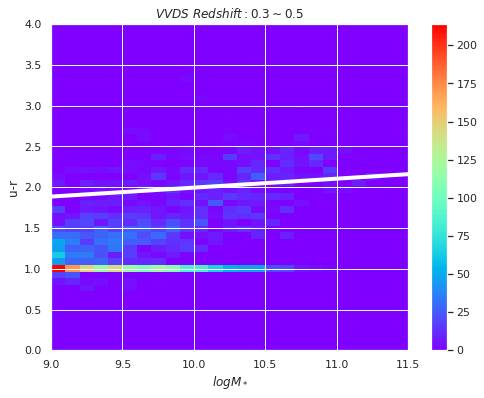

In [42]:
plt.figure(figsize = (8,6))
counts, xbins, ybins = np.histogram2d(mass, u_r,  bins=[30,50],range=[[9,12],[0,4]],weights = wei_final)
# print(xbins)
counts = counts.T
counts = counts[::-1]
# weight2 = counts / np.sum(counts,axis = 0)
# weight2[weight2==0]=np.nan
plt.imshow(counts,cmap='rainbow',extent=[xbins[0],xbins[-1],ybins[0],ybins[-1]],aspect='auto')
plt.colorbar()
# plt.plot([9.0,0.52796795083083],[10,0.5819679508308301],color = "red",linewidth = 2,label="cut")
# plt.plot([9.0,12.0],[0.52796795083083,0.6899679508308301],"white",linewidth = 2,label="cut")
plt.plot([9.0,12.0],[1.885,2.215],"-",color="white",linewidth = 4,label="cut")

plt.xlabel("$log M_*$")
plt.ylabel("u-r")
plt.xlim(9,11.5)
plt.ylim(0,4)
plt.title("$VVDS \ Redshift : 0.3 \sim 0.5$")
# plt.grid()
# plt.savefig("./vvds_number.pdf",dpi=100)
# plt.savefig("/home/yunzheng/PAC/picture/VVDS/u_r_weight.pdf",dpi = 100)

/tmp/ipykernel_378366/3369416510.py:6: RuntimeWarning: invalid value encountered in true_divide
  weight2 = counts / np.sum(counts,axis = 0)


Text(0.5, 1.0, '$VVDS \\ Redshift : 0.3 \\sim 0.5$')

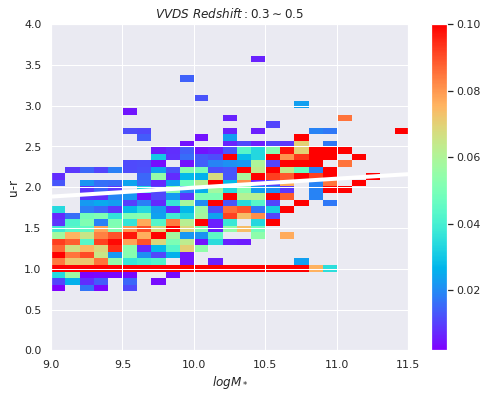

In [43]:
plt.figure(figsize = (8,6))
counts, xbins, ybins = np.histogram2d(mass, u_r,  bins=[30,50],range=[[9,12],[0,4]],weights = wei_final)
# print(xbins)
counts = counts.T
counts = counts[::-1]
weight2 = counts / np.sum(counts,axis = 0)
weight2[weight2==0]=np.nan
plt.imshow(weight2,cmap='rainbow',extent=[xbins[0],xbins[-1],ybins[0],ybins[-1]],aspect='auto',vmax=0.1)
plt.colorbar()
# plt.plot([9.0,0.52796795083083],[10,0.5819679508308301],color = "red",linewidth = 2,label="cut")
# plt.plot([9.0,12.0],[0.52796795083083,0.6899679508308301],"white",linewidth = 2,label="cut")
plt.plot([9.0,12.0],[1.885,2.215],"-",color="white",linewidth = 4,label="cut")

plt.xlabel("$log M_*$")
plt.ylabel("u-r")
plt.xlim(9,11.5)
plt.ylim(0,4)
plt.title("$VVDS \ Redshift : 0.3 \sim 0.5$")
# plt.grid()
# plt.savefig("./vvds_density.pdf",dpi=100)
# plt.savefig("/home/yunzheng/PAC/picture/VVDS/u_r_weight.pdf",dpi = 100)

In [41]:
np.save("./VVDS_3_5.npy",np.array([mass,u_r,weight0]))

In [44]:
weight1 = wei_final
massbin = np.array([9.0,9.5,10.0,10.5,11])
All = np.zeros(4)
up = np.zeros(4)
down = np.zeros(4)
frac = np.zeros(4)
for i in range(len(massbin)-1):
    index = ((mass>=massbin[i])&(mass<massbin[i+1])&(u_r>=0.0)&(u_r<=4.0))
    All[i] = np.sum(weight1[index])
    print("The length of All:",len(weight1[index]))
    print(All[i])
    cut = ((u_r[index]-(0.11 * mass[index] - 0.45 * 0.1 + 0.94))>0)
    up[i] = np.sum(weight1[index][cut])
    print("The length of up:",len(weight1[index][cut]))
    print(up[i])
    down[i] = np.sum(weight1[index][~cut])
    print("The length of down:",len(weight1[index][~cut]))
    print(down[i])

The length of All: 918
2006.0235508158823
The length of up: 18
58.028430400374255
The length of down: 900
1947.9951204155082
The length of All: 917
1375.2583736142706
The length of up: 63
137.72372832328168
The length of down: 854
1237.534645290989
The length of All: 535
908.5206443178256
The length of up: 109
231.5331797167876
The length of down: 426
676.987464601038
The length of All: 181
358.85056376681274
The length of up: 96
213.17255959350365
The length of down: 85
145.67800417330906


ValueError: s must be a scalar, or float array-like with the same size as x and y

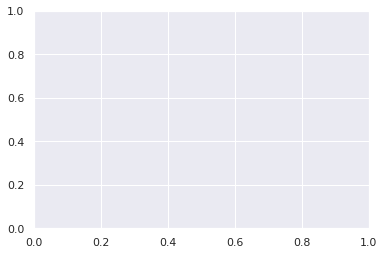

In [50]:
frac = up / All
up0 = up**2
All0 = All**2
bar = np.sqrt(up0/All0)
massbin_0 = 0.5 * (massbin[1:]+massbin[:-1])
f0 = np.array([0.0479142 , 0.16473545, 0.33705295, 0.66789355])
plt.scatter(massbin_0,f0,'*')
plt.errorbar(massbin_0,frac,bar)
plt.xlabel("$log M_*$")
plt.ylabel("Fraction")
plt.title("$VVDS \ Redshift : 0.3 \sim 0.5$")
plt.xticks(np.arange(9, 11.1, step=0.5))
plt.yticks(np.arange(0, 1.01, step=0.2))
# plt.savefig("./VVDS_frac.pdf",dpi=100)

In [46]:
frac

array([0.02892709, 0.10014389, 0.25484636, 0.59404271])

In [57]:
index = ((redshift<=0.7)&(redshift>=0.5))
mass = mass[index]
u_r = u_r[index]
wei_all = wei_all[index]
zmax = zmax[index]
redshift = redshift[index]

index=(zmax>=0.5)
zmax = zmax[index]
u_r = u_r[index]
redshift = redshift[index]
wei_all = wei_all[index]
mass= mass[index] 


zmax[(zmax>0.7)]=0.7

In [58]:
V_0 = []
for i in range(len(zmax)):
    temp = cosmo.comoving_volume(zmax[i]) - cosmo.comoving_volume(0.5)
    V_0.append(temp.value)
    
V_1 = np.array(V_0)
# weight0 = Vtotal.value/ V_1
Vtotal = cosmo.comoving_volume(0.7) - cosmo.comoving_volume(0.5)
# Vtotal
weight0 = Vtotal.value/V_1

In [60]:
wei_final = wei_all * weight0

Text(0.5, 1.0, '$VVDS \\ Redshift : 0.5 \\sim 0.7$')

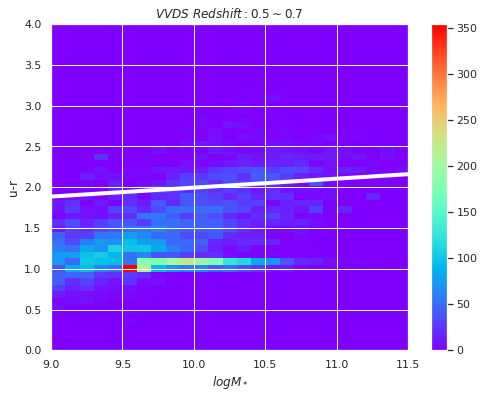

In [61]:
plt.figure(figsize = (8,6))
counts, xbins, ybins = np.histogram2d(mass, u_r,  bins=[30,50],range=[[9,12],[0,4]],weights = wei_final)
# print(xbins)
counts = counts.T
counts = counts[::-1]
# weight2 = counts / np.sum(counts,axis = 0)
# weight2[weight2==0]=np.nan
plt.imshow(counts,cmap='rainbow',extent=[xbins[0],xbins[-1],ybins[0],ybins[-1]],aspect='auto')
plt.colorbar()
# plt.plot([9.0,0.52796795083083],[10,0.5819679508308301],color = "red",linewidth = 2,label="cut")
# plt.plot([9.0,12.0],[0.52796795083083,0.6899679508308301],"white",linewidth = 2,label="cut")
plt.plot([9.0,12.0],[1.885,2.215],"-",color="white",linewidth = 4,label="cut")

plt.xlabel("$log M_*$")
plt.ylabel("u-r")
plt.xlim(9,11.5)
plt.ylim(0,4)
plt.title("$VVDS \ Redshift : 0.5 \sim 0.7$")
# plt.grid()
# plt.savefig("./vvds_number.pdf",dpi=100)
# plt.savefig("/home/yunzheng/PAC/picture/VVDS/u_r_weight.pdf",dpi = 100)

/tmp/ipykernel_381519/4134459825.py:6: RuntimeWarning: invalid value encountered in true_divide
  weight2 = counts / np.sum(counts,axis = 0)


Text(0.5, 1.0, '$VVDS \\ Redshift : 0.5 \\sim 0.7$')

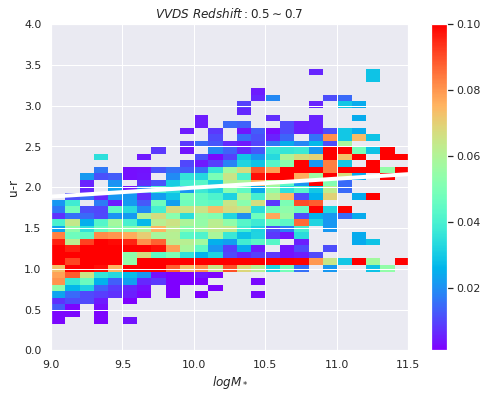

In [62]:
plt.figure(figsize = (8,6))
counts, xbins, ybins = np.histogram2d(mass, u_r,  bins=[30,50],range=[[9,12],[0,4]],weights = wei_final)
# print(xbins)
counts = counts.T
counts = counts[::-1]
weight2 = counts / np.sum(counts,axis = 0)
weight2[weight2==0]=np.nan
plt.imshow(weight2,cmap='rainbow',extent=[xbins[0],xbins[-1],ybins[0],ybins[-1]],aspect='auto',vmax=0.1)
plt.colorbar()
# plt.plot([9.0,0.52796795083083],[10,0.5819679508308301],color = "red",linewidth = 2,label="cut")
# plt.plot([9.0,12.0],[0.52796795083083,0.6899679508308301],"white",linewidth = 2,label="cut")
plt.plot([9.0,12.0],[1.885,2.215],"-",color="white",linewidth = 4,label="cut")

plt.xlabel("$log M_*$")
plt.ylabel("u-r")
plt.xlim(9,11.5)
plt.ylim(0,4)
plt.title("$VVDS \ Redshift : 0.5 \sim 0.7$")
# plt.grid()
# plt.savefig("./vvds_density.pdf",dpi=100)
# plt.savefig("/home/yunzheng/PAC/picture/VVDS/u_r_weight.pdf",dpi = 100)

In [63]:
weight1 = wei_final
massbin = np.array([9.0,9.5,10.0,10.5,11])
All = np.zeros(4)
up = np.zeros(4)
down = np.zeros(4)
frac = np.zeros(4)
for i in range(len(massbin)-1):
    index = ((mass>=massbin[i])&(mass<massbin[i+1])&(u_r>=0.0)&(u_r<=4.0))
    All[i] = np.sum(weight1[index])
    print("The length of All:",len(weight1[index]))
    print(All[i])
    cut = ((u_r[index]-(0.11 * mass[index] - 0.45 * 0.1 + 0.94))>0)
    up[i] = np.sum(weight1[index][cut])
    print("The length of up:",len(weight1[index][cut]))
    print(up[i])
    down[i] = np.sum(weight1[index][~cut])
    print("The length of down:",len(weight1[index][~cut]))
    print(down[i])

The length of All: 1117
3093.9799098343815
The length of up: 16
103.0774618847767
The length of down: 1101
2990.9024479496047
The length of All: 2443
4386.293967050941
The length of up: 82
234.22181087071655
The length of down: 2361
4152.072156180226
The length of All: 2199
2987.229054873751
The length of up: 350
621.2807052392213
The length of down: 1849
2365.94834963453
The length of All: 711
1131.133860196287
The length of up: 313
484.7212386481083
The length of down: 398
646.4126215481788
